In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
train_edges = pd.read_csv('flights.csv')
train_edges

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2015,1,1,4,UA,1012,N17245,IAD,IAH,535,...,816.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
95,2015,1,1,4,B6,2001,N358JB,BUF,JFK,535,...,648.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
96,2015,1,1,4,B6,2807,N190JB,PWM,JFK,535,...,635.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
97,2015,1,1,4,B6,2023,N324JB,JFK,SJU,535,...,1039.0,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0


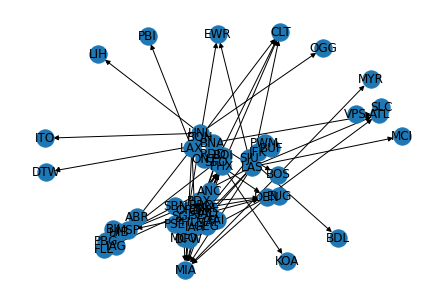

In [45]:
def get_graph(x):
    G= nx.from_pandas_edgelist(x,'ORIGIN_AIRPORT','DESTINATION_AIRPORT',create_using=nx.DiGraph())
    return G

G = get_graph(train_edges)
nx.draw(G,with_labels =True)

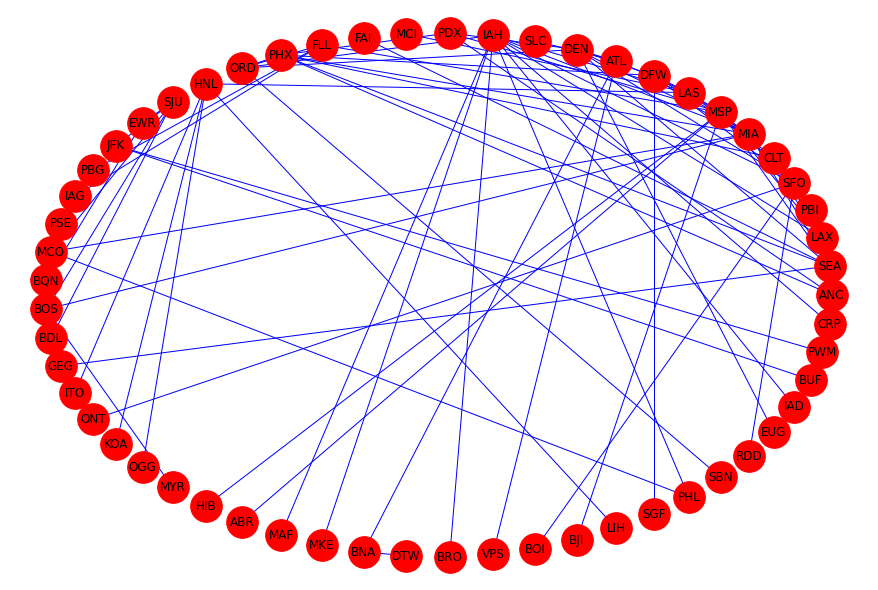

In [40]:
pos = nx.circular_layout(G)
plt.figure(figsize=(12,8))
d = dict(G.degree)

nx.draw(G, pos=pos,node_color='red',with_labels=True, node_size=1000, edge_color='b')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='black', font_size=15)
plt.show()

In [41]:
source=train_edges['ORIGIN_AIRPORT'].tolist()
dest=train_edges['DESTINATION_AIRPORT'].tolist()
source.extend(dest)
airports=list(np.unique(source))
len(airports)


57

In [42]:
from ipywidgets import interact, interactive, fixed, interact_manual
def f(x1,x2):
    k=0
    for i in nx.all_simple_paths(G, source=x1, target=x2, cutoff=None):
        print(i)
        k=k+1
    if k==0:
        print("No path available")
interact(f,x1=airports,x2=airports)

interactive(children=(Dropdown(description='x1', options=('ABR', 'ANC', 'ATL', 'BDL', 'BJI', 'BNA', 'BOI', 'BO…

<function __main__.f(x1, x2)>

In [47]:
nx.average_shortest_path_length(G)

0.12656641604010024

#### directed graph the avg shortest path is o.12


In [57]:
airport_vis_list ={}
for i in G.nodes():
    airport_vis_list[i] =G.in_degree(i)
# print(airport_vis_list)
k = dict(sorted(airport_vis_list.items(),key=lambda x:x[1]))
print(k)

{'LAX': 0, 'LAS': 0, 'SLC': 0, 'FAI': 0, 'PBG': 0, 'IAG': 0, 'PSE': 0, 'BQN': 0, 'GEG': 0, 'ONT': 0, 'HIB': 0, 'ABR': 0, 'MAF': 0, 'MKE': 0, 'BNA': 0, 'BRO': 0, 'VPS': 0, 'BOI': 0, 'BJI': 0, 'SGF': 0, 'PHL': 0, 'SBN': 0, 'RDD': 0, 'EUG': 0, 'IAD': 0, 'BUF': 0, 'PWM': 0, 'CRP': 0, 'ANC': 1, 'PBI': 1, 'PDX': 1, 'MCI': 1, 'HNL': 1, 'SJU': 1, 'BOS': 1, 'BDL': 1, 'ITO': 1, 'KOA': 1, 'OGG': 1, 'MYR': 1, 'DTW': 1, 'LIH': 1, 'ORD': 2, 'EWR': 2, 'SEA': 3, 'SFO': 3, 'JFK': 3, 'CLT': 4, 'FLL': 4, 'PHX': 4, 'MCO': 4, 'DFW': 5, 'ATL': 5, 'DEN': 5, 'MSP': 8, 'MIA': 9, 'IAH': 10}


In [63]:
print('The airport that is visited frequently is : ',list(k)[-1])

The airport that is visited frequently is :  IAH
